In [41]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
import numpy as np

In [42]:
sub = 2

movement_data = pd.read_csv('../data/data_movements_' + str(sub) + '.csv')

In [43]:
#movement_data.loc[movement_data.state == "reach"]

<Axes: xlabel='x', ylabel='y'>

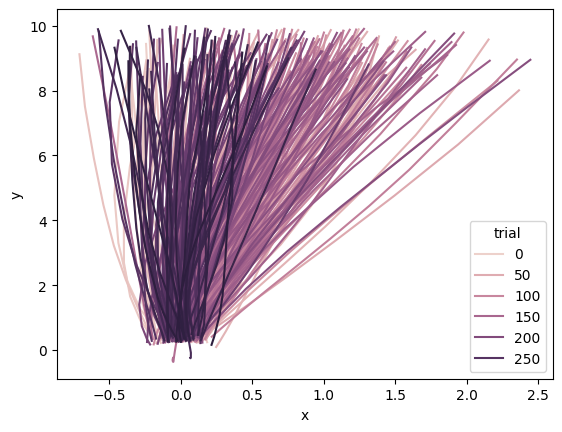

In [44]:
sns.lineplot(data = movement_data.loc[movement_data.state.isin(['reach'])], x = "x", y = "y", hue = "trial", sort = False)

In [45]:
#sns.lineplot(data = movement_data, x = "x", y = "y", hue = "trial", sort = False)

In [46]:
movement_data.head(200)

,Unnamed: 0,trial,state,sample,time,x,y
0,0,0,search_near,0,0.007928,0.857663,0.217027
1,1,0,search_near,1,0.016537,0.857663,0.217023
2,2,0,search_near,2,0.029551,0.857673,0.217016
3,3,0,search_near,3,0.045526,0.857680,0.216994
4,4,0,search_near,4,0.063561,0.857674,0.217015
...,...,...,...,...,...,...,...
195,195,0,hold,195,3.244451,-0.113578,-0.003989
196,196,0,hold,196,3.261494,-0.113522,-0.004008
197,197,0,move_prep,197,3.279956,-0.113482,-0.004086
198,198,0,move_prep,198,3.294738,-0.113456,-0.004087


In [47]:
#Checking that there are 300 reach trials: conclusion = yes
movement_data.loc[(movement_data.trial == 299) & (movement_data.state == 'reach')]

,Unnamed: 0,trial,state,sample,time,x,y
77554,62,299,reach,79074,1317.958047,0.002245,0.255991
77555,63,299,reach,79075,1317.973788,-0.004609,0.421306
77556,64,299,reach,79076,1317.991611,-0.013353,0.777509
77557,65,299,reach,79077,1318.007576,-0.012618,1.099481
77558,66,299,reach,79078,1318.023682,0.001219,1.680047
77559,67,299,reach,79079,1318.040600,0.037428,2.446139
77560,68,299,reach,79080,1318.057606,0.107810,3.405158
77561,69,299,reach,79081,1318.073709,0.216017,4.556464
77562,70,299,reach,79082,1318.091598,0.381594,6.226471
77563,71,299,reach,79083,1318.106619,0.481884,7.303915


In [48]:
# convert x, y coordinates for 'reach' to polar and add these to the data as columns 
# function inspired from https://stackoverflow.com/questions/20924085/python-conversion-between-coordinates 
def cart2pol(x, y):
    r = []
    theta = []
    for i in range(len(x)): 
        r.append(np.sqrt((x[i])**2 + (y[i])**2))
        theta.append(np.arctan2(y[i], x[i]))
    return(r, theta)

# create new subset of movement data only including reach state 
reach_data = movement_data.loc[movement_data.state == 'reach'].copy()

reach_x = reach_data.loc[(reach_data.state == 'reach'), 'x'].values
reach_y  = reach_data.loc[(reach_data.state == 'reach'), 'y'].values

r, theta = cart2pol(reach_x, reach_y)

In [49]:
# add r and theta to the reach dataset as columns 
reach_data['r'] = r
reach_data['theta'] = theta

In [50]:
reach_data

,Unnamed: 0,trial,state,sample,time,x,y,r,theta
229,229,0,reach,229,3.812085,0.030218,0.584637,0.585418,1.519155
230,230,0,reach,230,3.828657,0.058007,1.139891,1.141366,1.519952
231,231,0,reach,231,3.844648,0.093824,1.907974,1.910279,1.521661
232,232,0,reach,232,3.861608,0.142738,2.878400,2.881937,1.521247
233,233,0,reach,233,3.878643,0.201955,4.059626,4.064646,1.521090
...,...,...,...,...,...,...,...,...,...
77560,68,299,reach,79080,1318.057606,0.107810,3.405158,3.406864,1.539146
77561,69,299,reach,79081,1318.073709,0.216017,4.556464,4.561582,1.523423
77562,70,299,reach,79082,1318.091598,0.381594,6.226471,6.238154,1.509587
77563,71,299,reach,79083,1318.106619,0.481884,7.303915,7.319794,1.504916
